In [1]:
import zipfile
import os
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats


In [2]:
#unzipping the files
with zipfile.ZipFile("womens-ecommerce-clothing-reviews.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',header=0, index_col=0)
display(df.head())
print(len(df))

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


23486


In [9]:
#Checking the data
count_type_reviews= df["Review Text"].notnull().value_counts()
#print(count_type_reviews)

#deleting the Nan reviews
df1= df[df["Review Text"].notnull()]
display(df1.head())

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
!pip install vaderSentiment

  Using cached https://files.pythonhosted.org/packages/86/9e/c53e1fc61aac5ee490a6ac5e21b1ac04e55a7c2aba647bb8411c9aadf24e/vaderSentiment-3.2.1-py2.py3-none-any.whl


In [10]:
#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def findAllSentiment(text):
    vs = analyzer.polarity_scores(text)
    sentarr=[vs["pos"], vs["neg"],vs["compound"]]
    return sentarr


In [11]:
df1["Positive Score"]= df1["Review Text"].map(lambda x : findAllSentiment(x)[0] )
df1["Negative Score"]=df1["Review Text"].map(lambda x : findAllSentiment(x)[1] )
df1["Neutral Score"]=df1["Review Text"].map(lambda x : findAllSentiment(x)[2] )

display(df1.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Positive Score,Negative Score,Neutral Score
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.728,0.000,0.8932
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.336,0.000,0.9729
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.181,0.027,0.9427
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.434,0.226,0.5727
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.300,0.000,0.9291


In [12]:
#Remove ages 90+
df1= df1[df1.Age<85]

In [13]:
#Basic Statistics about the variables

df_stats= df1.filter(items=['Age','Rating','Positive Feedback Count','Positive Score','Negative Score','Neutral Score', 'Class Name','Department Name'])
df_stats.columns= ['Age','Rating','Positive_Feedback_Count','Positive_Score','Negative_Score','Neutral_Score', 'Class_Name','Department_Name']
display(df_stats.head())


,Age,Rating,Positive_Feedback_Count,Positive_Score,Negative_Score,Neutral_Score,Class_Name,Department_Name
0,33,4,0,0.728,0.000,0.8932,Intimates,Intimate
1,34,5,4,0.336,0.000,0.9729,Dresses,Dresses
2,60,3,0,0.181,0.027,0.9427,Dresses,Dresses
3,50,5,0,0.434,0.226,0.5727,Pants,Bottoms
4,47,5,6,0.300,0.000,0.9291,Blouses,Tops


In [14]:
df_stats.to_csv("stats.csv", index=False)

In [3]:
df_stats=pd.read_csv("stats.csv")
display(df_stats.head())

,Age,Rating,Positive_Feedback_Count,Positive_Score,Negative_Score,Neutral_Score,Class_Name,Department_Name
0,33,4,0,0.728,0.000,0.8932,Intimates,Intimate
1,34,5,4,0.336,0.000,0.9729,Dresses,Dresses
2,60,3,0,0.181,0.027,0.9427,Dresses,Dresses
3,50,5,0,0.434,0.226,0.5727,Pants,Bottoms
4,47,5,6,0.300,0.000,0.9291,Blouses,Tops


In [4]:
count_age= df_stats["Age"].isnull().value_counts()
print(count_age)
print("")

count_rat= df_stats["Rating"].isnull().value_counts()
print(count_rat)
print("")

count_pfc= df_stats["Positive_Feedback_Count"].isnull().value_counts()
print(count_pfc)
print("")

count_pos= df_stats["Positive_Score"].isnull().value_counts()
print(count_pos)
print("")

count_neg= df_stats["Negative_Score"].isnull().value_counts()
print(count_neg)
print("")

count_neu= df_stats["Neutral_Score"].isnull().value_counts()
print(count_neu)
print("")

count_class= df_stats["Class_Name"].isnull().value_counts()
print(count_class)
print("")

count_dept= df_stats["Department_Name"].isnull().value_counts()
print(count_dept)
print("")

False    22610
Name: Age, dtype: int64

False    22610
Name: Rating, dtype: int64

False    22610
Name: Positive_Feedback_Count, dtype: int64

False    22610
Name: Positive_Score, dtype: int64

False    22610
Name: Negative_Score, dtype: int64

False    22610
Name: Neutral_Score, dtype: int64

False    22597
True        13
Name: Class_Name, dtype: int64

False    22597
True        13
Name: Department_Name, dtype: int64



In [5]:
df_stats= df_stats[df_stats["Class_Name"].notnull()]
print(len(df_stats))
display(df_stats.head())

count_dept= df_stats["Department_Name"].isnull().value_counts()
print(count_dept)
print("")

22597


,Age,Rating,Positive_Feedback_Count,Positive_Score,Negative_Score,Neutral_Score,Class_Name,Department_Name
0,33,4,0,0.728,0.000,0.8932,Intimates,Intimate
1,34,5,4,0.336,0.000,0.9729,Dresses,Dresses
2,60,3,0,0.181,0.027,0.9427,Dresses,Dresses
3,50,5,0,0.434,0.226,0.5727,Pants,Bottoms
4,47,5,6,0.300,0.000,0.9291,Blouses,Tops


False    22597
Name: Department_Name, dtype: int64



In [10]:
df_stats.describe()

,Age,Rating,Positive_Feedback_Count,Positive_Score,Negative_Score,Neutral_Score
count,22597.000000,22597.000000,22597.000000,22597.000000,22597.000000,22597.000000
mean,43.219365,4.183299,2.632429,0.233929,0.034851,0.735736
std,12.215876,1.115493,5.789742,0.123631,0.047324,0.371579
min,18.000000,1.000000,0.000000,0.000000,0.000000,-0.956200
25%,34.000000,4.000000,0.000000,0.148000,0.000000,0.709100
50%,41.000000,5.000000,1.000000,0.216000,0.020000,0.888900
75%,52.000000,5.000000,3.000000,0.299000,0.055000,0.949400
max,84.000000,5.000000,122.000000,1.000000,0.655000,0.995900


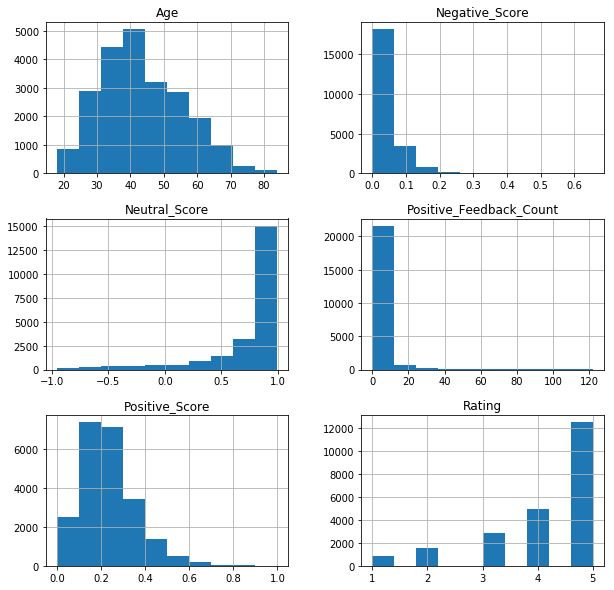

In [11]:
df_stats.hist(figsize=(10,10))
plt.savefig("histdes.png")

In [12]:
#Rating~ Age +all score
results_ratscore=smf.ols("Rating~Age+Positive_Score+Negative_Score+Neutral_Score",data=df_stats).fit()
print(results_ratscore.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     2060.
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:48:30   Log-Likelihood:                -31020.
No. Observations:               22597   AIC:                         6.205e+04
Df Residuals:                   22592   BIC:                         6.209e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2468      0.032    101.

In [13]:
#Positive FeedbackCount~ age +all score
results_fcscore=smf.ols("Positive_Feedback_Count~Age+Positive_Score+Negative_Score+Neutral_Score",data=df_stats).fit()
print(results_fcscore.summary())

                               OLS Regression Results                              
Dep. Variable:     Positive_Feedback_Count   R-squared:                       0.019
Model:                                 OLS   Adj. R-squared:                  0.019
Method:                      Least Squares   F-statistic:                     112.1
Date:                     Wed, 02 Jan 2019   Prob (F-statistic):           8.51e-95
Time:                             15:48:37   Log-Likelihood:                -71524.
No. Observations:                    22597   AIC:                         1.431e+05
Df Residuals:                        22592   BIC:                         1.431e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [14]:
##Rating~ Age + all_score+ department
results_ratdept=smf.ols("Rating~Age+Neutral_Score+Positive_Score+Negative_Score+Department_Name",data=df_stats).fit()
print(results_ratdept.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     925.6
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:48:40   Log-Likelihood:                -30986.
No. Observations:               22597   AIC:                         6.199e+04
Df Residuals:                   22587   BIC:                         6.207e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [6]:
def AgeChange(x):
    if 0 < x <= 20:
        return '0-20'
    elif 20 < x <= 30:
        return '20-30'
    elif 30 < x <= 40:
        return '30-40'
    elif 40 < x <= 50:
        return '40-50'
    elif 50 < x <= 60:
        return '50-60'
    elif 60 < x <= 80:
        return '60-80'
    return '80+'

In [7]:
df_stats["Age_Category"]=df_stats["Age"].apply(AgeChange)
display(df_stats.head())

,Age,Rating,Positive_Feedback_Count,Positive_Score,Negative_Score,Neutral_Score,Class_Name,Department_Name,Age_Category
0,33,4,0,0.728,0.000,0.8932,Intimates,Intimate,30-40
1,34,5,4,0.336,0.000,0.9729,Dresses,Dresses,30-40
2,60,3,0,0.181,0.027,0.9427,Dresses,Dresses,50-60
3,50,5,0,0.434,0.226,0.5727,Pants,Bottoms,40-50
4,47,5,6,0.300,0.000,0.9291,Blouses,Tops,40-50


In [18]:
df_stats.to_csv("stats2.csv", index=False)

In [17]:
print(len(df_stats[df_stats["Age_Category"]=="0-20"]))
print(len(df_stats[df_stats["Age_Category"]=="20-30"]))
print(len(df_stats[df_stats["Age_Category"]=="30-40"]))
print(len(df_stats[df_stats["Age_Category"]=="40-50"]))
print(len(df_stats[df_stats["Age_Category"]=="50-60"]))
print(len(df_stats[df_stats["Age_Category"]=="60-80"]))
print(len(df_stats[df_stats["Age_Category"]=="80+"]))
print(len(df_stats[df_stats["Age_Category"].isnull()]))
         

149
3070
7542
5700
3783
2286
67
0


In [18]:
#Rating~ Agecat+allscore
results_agecatcn1=smf.ols("Rating~ Age_Category+Positive_Score+Negative_Score+Neutral_Score",data=df_stats).fit()
print(results_agecatcn1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     917.3
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:48:57   Log-Likelihood:                -31013.
No. Observations:               22597   AIC:                         6.205e+04
Df Residuals:                   22587   BIC:                         6.213e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.41

In [19]:
print(np.mean(df_stats[df_stats["Age_Category"]=="0-20"].Rating))
print(results_agecatcn1.params[0])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="20-30"].Rating))
print(results_agecatcn1.params[1])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="30-40"].Rating))
print(results_agecatcn1.params[2])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="40-50"].Rating))
print(results_agecatcn1.params[3])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="50-60"].Rating))
print(results_agecatcn1.params[4])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="60-80"].Rating))
print(results_agecatcn1.params[5])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="80+"].Rating))
print(results_agecatcn1.params[6])
print("")

4.308724832214765
3.4133325030471307

4.173941368078176
-0.0752193071767945

4.1487669053301515
-0.07682966797891208

4.151929824561403
-0.07226946440302964

4.236320380650278
-0.0034196736106103798

4.278652668416448
0.024147251510813317

4.641791044776119
0.22617061716347725



In [20]:
print(results_agecatcn1.f_pvalue)
print(results_agecatcn1.pvalues[0])

0.0
0.0


In [9]:
#T-tests Rating
age_cat= ["0-20","20-30","30-40","40-50","50-60","60-80","80+"]
tr=np.zeros(shape=(7,7))
tr=np.array(tr, dtype=float)

for c,i in enumerate(age_cat):
    for k,j in enumerate(age_cat):
        t_p=stats.ttest_ind(df_stats[df_stats["Age_Category"]==i].Rating, df_stats[df_stats["Age_Category"]==j].Rating)
        
        tr[c][k]= t_p[1]
print(tr)



[[1.00000000e+00 1.47614387e-01 8.49944647e-02 9.11728770e-02
  4.31330190e-01 7.41827480e-01 1.74591328e-02]
 [1.47614387e-01 1.00000000e+00 2.94810907e-01 3.79875931e-01
  2.07773590e-02 5.94472960e-04 6.59058280e-04]
 [8.49944647e-02 2.94810907e-01 1.00000000e+00 8.72591758e-01
  8.63222480e-05 1.11218747e-06 3.50034000e-04]
 [9.11728770e-02 3.79875931e-01 8.72591758e-01 1.00000000e+00
  3.11398408e-04 4.20268621e-06 3.72230960e-04]
 [4.31330190e-01 2.07773590e-02 8.63222480e-05 3.11398408e-04
  1.00000000e+00 1.45894905e-01 2.87102382e-03]
 [7.41827480e-01 5.94472960e-04 1.11218747e-06 4.20268621e-06
  1.45894905e-01 1.00000000e+00 6.76800723e-03]
 [1.74591328e-02 6.59058280e-04 3.50034000e-04 3.72230960e-04
  2.87102382e-03 6.76800723e-03 1.00000000e+00]]


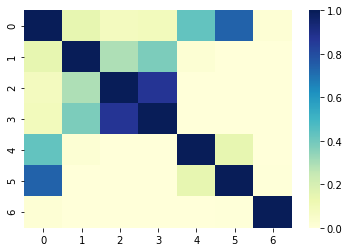

In [11]:
ax = sns.heatmap(tr,cmap="YlGnBu", vmin=0, vmax=1)
plt.savefig("heatmap.png")

In [115]:
#Positive-Feedback_Count~ Agecat+allscore
results_agecatcn2=smf.ols("Positive_Feedback_Count~ Age_Category+Positive_Score+Negative_Score+Neutral_Score",data=df_stats).fit()
print(results_agecatcn2.summary())

                               OLS Regression Results                              
Dep. Variable:     Positive_Feedback_Count   R-squared:                       0.020
Model:                                 OLS   Adj. R-squared:                  0.020
Method:                      Least Squares   F-statistic:                     52.28
Date:                     Mon, 31 Dec 2018   Prob (F-statistic):           1.23e-94
Time:                             19:29:04   Log-Likelihood:                -71513.
No. Observations:                    22597   AIC:                         1.430e+05
Df Residuals:                        22587   BIC:                         1.431e+05
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [117]:
print(np.mean(df_stats[df_stats["Age_Category"]=="0-20"].Positive_Feedback_Count))
print(results_agecatcn2.params[0])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="20-30"].Positive_Feedback_Count))
print(results_agecatcn2.params[1])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="30-40"].Positive_Feedback_Count))
print(results_agecatcn2.params[2])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="40-50"].Positive_Feedback_Count))
print(results_agecatcn2.params[3])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="50-60"].Positive_Feedback_Count))
print(results_agecatcn2.params[4])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="60-80"].Positive_Feedback_Count))
print(results_agecatcn2.params[5])
print("")

print(np.mean(df_stats[df_stats["Age_Category"]=="80+"].Positive_Feedback_Count))
print(results_agecatcn2.params[6])
print("")

1.4899328859060403
2.2934787788937947

2.0693811074918567
0.6274340220115298

2.6199946963670113
1.1330334003515294

2.577719298245614
1.094626399223055

2.992598466825271
1.5339981457519998

3.041119860017498
1.5703174747604316

2.746268656716418
1.4592957815740917



In [12]:
#T-tests Rating
age_cat= ["0-20","20-30","30-40","40-50","50-60","60-80","80+"]
tf=np.zeros(shape=(7,7))
tf=np.array(tf, dtype=float)

for c,i in enumerate(age_cat):
    for k,j in enumerate(age_cat):
        t_p=stats.ttest_ind(df_stats[df_stats["Age_Category"]==i].Positive_Feedback_Count, df_stats[df_stats["Age_Category"]==j].Positive_Feedback_Count)
        
        tf[c][k]= t_p[1]
print(tf)

[[1.00000000e+00 1.92957906e-01 2.15384461e-02 1.53915411e-02
  2.28046962e-03 2.40655403e-03 6.23878761e-03]
 [1.92957906e-01 1.00000000e+00 1.01976299e-05 3.03238307e-05
  3.58474315e-11 1.04976193e-09 3.08057702e-01]
 [2.15384461e-02 1.01976299e-05 1.00000000e+00 6.76257844e-01
  1.79320651e-03 3.49529537e-03 8.63265531e-01]
 [1.53915411e-02 3.03238307e-05 6.76257844e-01 1.00000000e+00
  4.94424612e-04 9.91388161e-04 8.01233011e-01]
 [2.28046962e-03 3.58474315e-11 1.79320651e-03 4.94424612e-04
  1.00000000e+00 7.62708303e-01 7.37274630e-01]
 [2.40655403e-03 1.04976193e-09 3.49529537e-03 9.91388161e-04
  7.62708303e-01 1.00000000e+00 6.98774472e-01]
 [6.23878761e-03 3.08057702e-01 8.63265531e-01 8.01233011e-01
  7.37274630e-01 6.98774472e-01 1.00000000e+00]]


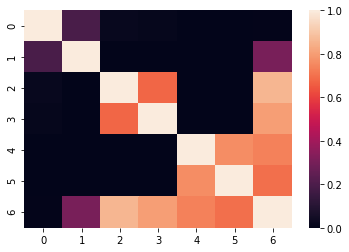

In [14]:
ax = sns.heatmap(tf, vmin=0, vmax=1)
plt.savefig("heatmap2.png")